# None Mass Shooting Analysis_ GVA Data Exploration (Illinois, 2024)

In [1]:
import json
import pandas as pd
import numpy as np
import random
from pathlib import Path

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
import myst_nb
import wikipedia as wp
import math



In [2]:
# Disable scientific notation globally
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['axes.formatter.use_mathtext'] = False
mpl.rcParams['axes.formatter.limits'] = (-999, 999)  # forces normal numbers

In [17]:
df = pd.read_csv('MSA Data\GVA_Illinois_24.csv')
scope = 'Illinois, 2024'
len(df)

3018

In [18]:
df.head(3)

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations
0,3106259,"December 31, 2024",Illinois,Chicago,1107 S Mozart St,0,1,0,0,0,NaN
1,3106276,"December 31, 2024",Illinois,Lewistown,518 S Main St,1,0,0,0,1,NaN
2,3105718,"December 31, 2024",Illinois,Chicago,7200 block of S Blackstone Ave,0,2,0,0,0,NaN


In [19]:
df.dtypes

Incident ID            int64
Incident Date         object
State                 object
City Or County        object
Address               object
Victims Killed         int64
Victims Injured        int64
Suspects Killed        int64
Suspects Injured       int64
Suspects Arrested      int64
Operations           float64
dtype: object

In [20]:
df['date'] = pd.to_datetime(df['Incident Date'], format = '%B %d, %Y', errors = 'coerce')

In [21]:
df = df.rename(columns={
    'City Or County': 'city',
    'Address': 'address',
    'Victims Killed': 'v_killed',
    'Victims Injured': 'v_injured',
    'Suspects Killed': 's_killed',
    'Suspects Injured': 's_injured',
    'Suspects Arrested': 's_arrested',
    'Incident ID': 'id'
    })
df.head(2)

,id,Incident Date,State,city,address,v_killed,v_injured,s_killed,s_injured,s_arrested,Operations,date
0,3106259,"December 31, 2024",Illinois,Chicago,1107 S Mozart St,0,1,0,0,0,NaN,2024-12-31
1,3106276,"December 31, 2024",Illinois,Lewistown,518 S Main St,1,0,0,0,1,NaN,2024-12-31


In [22]:
df['dow'] = df['date'].dt.day_name().str[:3]
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month_name().str[:3]
df['week'] = df['date'].dt.isocalendar().week
df['t_kill'] = df['v_killed'] + df['s_killed']
df['t_inj'] = df['v_injured'] + df['s_injured']
df['total'] = df['t_inj'] + df['t_kill']

In [23]:
df = df[[ 'date', 'dow','day', 'month', 'week','city', 'address', 'v_killed',
       'v_injured', 's_killed', 's_injured', 's_arrested', 't_kill', 't_inj', 'total', 'id']]
df.head(2)

,date,dow,day,month,week,city,address,v_killed,v_injured,s_killed,s_injured,s_arrested,t_kill,t_inj,total,id
0,2024-12-31,Tue,31,Dec,1,Chicago,1107 S Mozart St,0,1,0,0,0,0,1,1,3106259
1,2024-12-31,Tue,31,Dec,1,Lewistown,518 S Main St,1,0,0,0,1,1,0,1,3106276


In [24]:
df.nlargest(10, 'total').reset_index(drop=True)

,date,dow,day,month,week,city,address,v_killed,v_injured,s_killed,s_injured,s_arrested,t_kill,t_inj,total,id
0,2024-11-24,Sun,24,Nov,47,Venice,1426 Broadway,0,12,0,0,1,0,12,12,3115822
1,2024-04-13,Sat,13,Apr,15,Chicago,2021 W 52nd St,1,10,0,0,1,1,10,11,2879189
2,2024-01-21,Sun,21,Jan,3,Joliet,200 block of Davis St,8,1,1,0,1,9,1,10,2808531
3,2024-12-02,Mon,2,Dec,49,Chicago,3511 W 59th St,3,5,0,0,2,3,5,8,3085310
4,2024-07-05,Fri,5,Jul,27,Chicago,1300 block of W Hastings St,0,8,0,0,0,0,8,8,2959241
5,2024-09-21,Sat,21,Sep,38,Chicago,2500 block of S Spaulding Ave,1,6,0,0,0,1,6,7,3030761
6,2024-07-05,Fri,5,Jul,27,Chicago,100 block of S Menard Ave,1,6,0,0,0,1,6,7,2959290
7,2024-06-17,Mon,17,Jun,25,Chicago,6000 block of S Winchester Ave,0,7,0,0,0,0,7,7,2941749
8,2024-02-11,Sun,11,Feb,6,Chicago,W 30th St and S St Louis Ave,0,7,0,0,0,0,7,7,2825493
9,2024-08-20,Tue,20,Aug,34,Chicago,51st St and Ashland Ave,1,5,0,0,0,1,5,6,3000990


In [25]:
day_colours = {
    "Mon": "#a2bffe",  # pastel blue
    "Tue": "#7af9ab",  # Sea Foam Green
    "Wed": "#ffff14",  # Yellow
    "Thu": "#fdaa48",  # Light Orange    
    "Fri": "#ff474c",  # Light Red
    "Sat": "#910951",  # Reddish Purple
    "Sun": "#632de9",  # Purple Blue
}

In [26]:
month_colours = {
    "Jan": "#4C72B0", "Feb": "#6BAED6", "Mar": "#9ECAE1",
    "Apr": "#41AB5D", "May": "#74C476", "Jun": "#A1D99B",
    "Jul": "#FEC44F", "Aug": "#FE9929", "Sep": "#EC7014",
    "Oct": "#E6550D", "Nov": "#A63603", "Dec": "#756BB1"
}

Text(0.5, 0, 'Month')

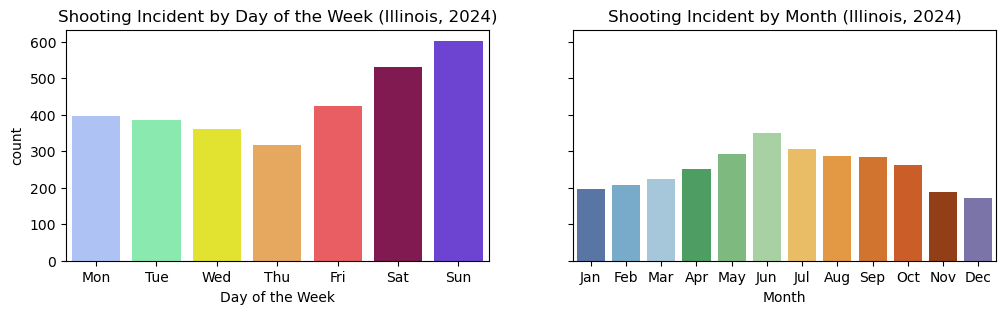

In [27]:
# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 3), sharey=True)

sns.countplot(df, x='dow', ax=ax1, palette = day_colours, hue='dow',
              order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
             ).set_title('Shooting Incident by Day of the Week (' + scope + ')')
ax1.set_xlabel("Day of the Week")

sns.countplot(df, x='month', ax=ax2,palette = month_colours, hue='month',
              order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov', 'Dec']
             ).set_title('Shooting Incident by Month (' + scope + ')')
ax2.set_xlabel("Month")
#plt.set_title('Mass Shooting Incident by Day of the Week & Month (\'14-\'24)')


**Day of the Week:** For all shooting incidents we see the same kind of pattern over the week as we saw with the national level data for MSI over 10 years, with most occuring over the weekend with Sunday being the most frequent day.

**Month of the Year:** Here we see that for shooting incidents this year follows the general pattern we saw for MSI, with more in the summer months, although the highest month was June and not July here.

Text(0.5, 1.0, 'Shooting Incident by Week (Illinois, 2024)')

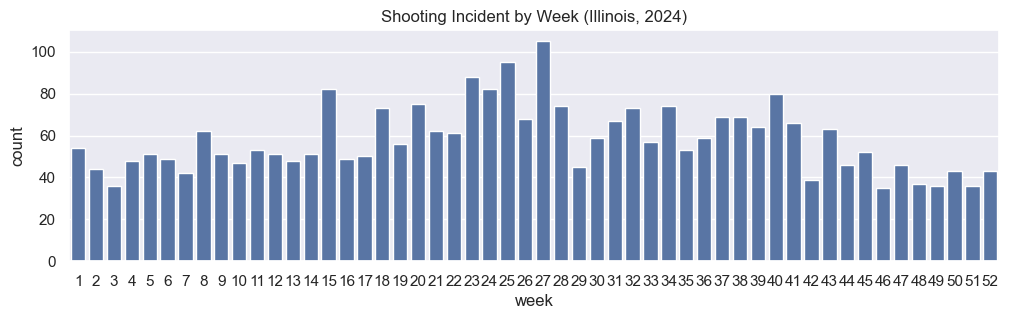

In [28]:
sns.set_theme()
plt.figure(figsize=(12,3))
sns.countplot(df, x='week', order=range(1,53), legend=False,).set_title('Shooting Incident by Week (' + scope + ')')

Text(0.5, 1.0, 'Shooting Incident by Day of Month (Illinois, 2024)')

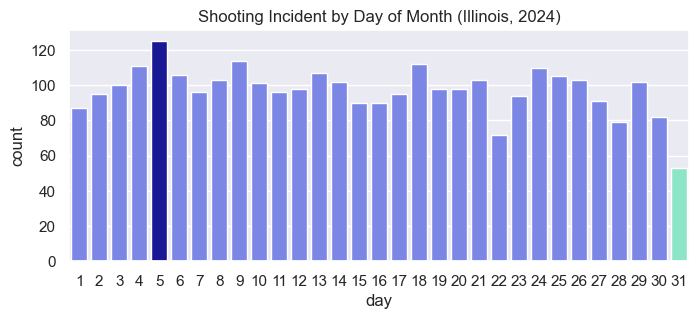

In [30]:
sns.set_theme()
plt.figure(figsize=(8,3))

all_days = sorted(df['day'].unique())
highlight_day = 31    
base_color = '#6a79f7'       # Cornflower Blue
highlight_color = "#7ef4cc" # Turquoise

day_palette = {day: base_color for day in all_days}
day_palette[highlight_day] = highlight_color
#day_palette[4] = '#0652ff' # Electric Blue
day_palette[5] = '#0504aa' #Royal Blue

sns.countplot(df, x='day', order=range(1,32), palette=day_palette, hue = 'day', legend=False,).set_title('Shooting Incident by Day of Month (' + scope + ')')

* N.B. Again the 31st has the fewest number of incidents due to there being fewer 31sts than any other date.
* In Illinois in 2024 there were the highest number of shootings on the 5th of the month. In the 10 year span of MSI data, the 4th was the date with most mass shooting incidents, due to the 4th of July (and 5th second), let's have a look at the actual calendar dates in 2024 to see if there is any particular spike on one day that year.

In [33]:
rage_days = df.groupby(['day','month','dow']).agg(
    no_inc = pd.NamedAgg(column="t_kill", aggfunc="count"),
    total_inj = pd.NamedAgg(column="t_inj", aggfunc="sum"),
    total_kld = pd.NamedAgg(column="t_kill", aggfunc="sum"), 
    total_inj_kill = pd.NamedAgg(column="total", aggfunc="sum")
)
rage_days.nlargest(10, 'no_inc').reset_index()

,day,month,dow,no_inc,total_inj,total_kld,total_inj_kill
0,5,Jul,Fri,34,49,10,59
1,16,Jun,Sun,25,25,8,33
2,9,Jun,Sun,24,22,6,28
3,17,Jun,Mon,22,35,4,39
4,23,Jun,Sun,21,22,5,27
5,19,May,Sun,20,25,1,26
6,3,Aug,Sat,19,22,5,27
7,4,May,Sat,19,12,8,20
8,6,Jul,Sat,19,15,6,21
9,7,Jul,Sun,19,23,7,30


**Day of the Year:** In 2024 in the state of Illinois, there were the highest number of shooting incidents on the 5th July, while the 4th of July doesn't appear in the top 10 yet the 6th and 7th of July do (positions 9 and 10). As Independence Day fell on a Thursday in 2024, it would appear that the 'celebrations' continued over the long weekend, into Friday (5th) and Saturday and Sunday (6th & 7th).  

(-0.5, 4.5)

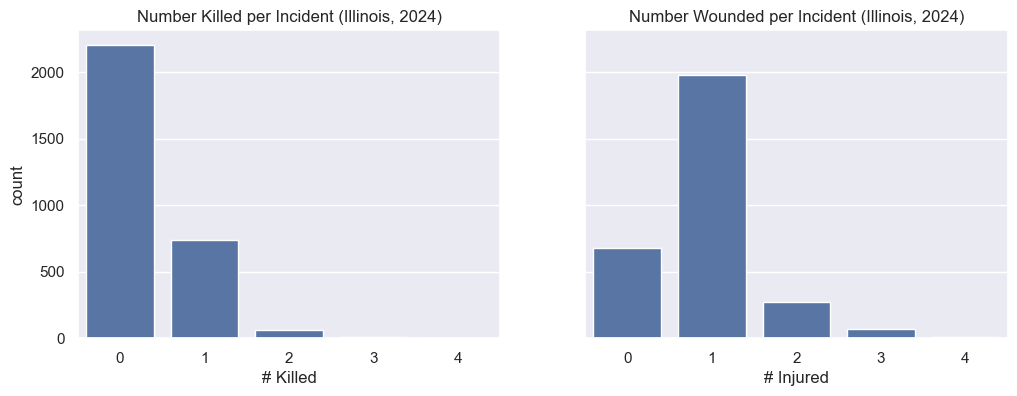

In [14]:
# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

sns.countplot(df, x='t_kill', ax=ax1).set_title('Number Killed per Incident (' + scope + ')')
ax1.set_xlabel("# Killed")
ax1.set_xlim(-0.5, 4.5)
sns.countplot(df, x='t_inj', ax=ax2).set_title('Number Wounded per Incident (' + scope + ')')
ax2.set_xlabel("# Injured")
ax2.set_xlim(-0.5, 4.5)

* So when we compare these 2 figures to the ones produced for 'Mass' shooting incidents - we can see that the vast majority of incidents where at least 1 person is shot involve nobody being killed and 1 person injured. There are a relatively small number of incidents where nobody is injured or killed, and nobody arrested. Further information regarding these subgroups are presented below. 

In [55]:
counts = pd.crosstab(df['v_killed'], df['v_injured'])

In [56]:
from matplotlib.colors import LogNorm

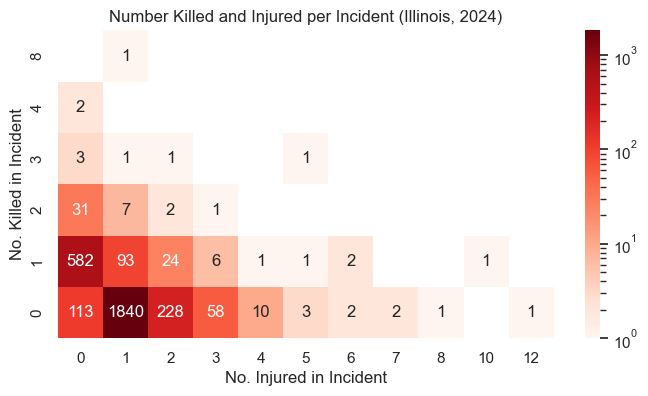

In [67]:
sns.set_style("white")
plt.figure(figsize=(8,4))
ax = sns.heatmap(counts, 
                 annot=True, 
                 fmt="d", 
                 norm=LogNorm(),
                 cmap="Reds")
ax.set_ylabel('No. Killed in Incident')
ax.set_xlabel('No. Injured in Incident')
ax.invert_yaxis()
plt.grid(False)
plt.title('Number Killed and Injured per Incident (' + scope + ')')
plt.show()

In [19]:
percentages = counts / counts.values.sum() * 100

In [20]:
perc_focus = percentages.loc[0:4, 0:4]

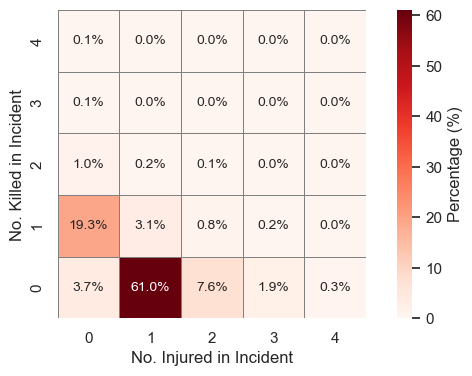

In [68]:
annot = perc_focus.map(lambda v: f"{v:.1f}%")

fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(
    perc_focus,
    ax=ax,
    annot=annot,    # preformatted strings
    fmt='',         # use the strings exactly (no extra formatting)
    cmap='Reds',
    cbar_kws={'label': 'Percentage (%)'},
    square=True,
    linewidths=0.5,
    linecolor='gray',
    annot_kws={'fontsize':10}
)

# flip so that the first row (y=0) appears at the bottom
ax.invert_yaxis()
ax.set_ylabel('No. Killed in Incident')
ax.set_xlabel('No. Injured in Incident')
plt.show()

In [72]:
s_counts = pd.crosstab(df['s_killed'], df['s_injured'])

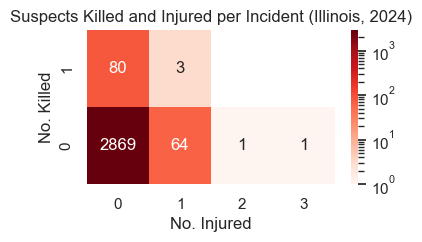

In [76]:
sns.set_style("white")
plt.figure(figsize=(4,2))
ax = sns.heatmap(s_counts, 
                 annot=True, 
                 fmt="d", 
                 norm=LogNorm(),
                 cmap="Reds")
ax.set_ylabel('No. Killed')
ax.set_xlabel('No. Injured')
ax.invert_yaxis()
plt.grid(False)
plt.title('Suspects Killed and Injured per Incident (' + scope + ')')
plt.show()

In [29]:
no_vict = df[(df['v_killed'] == 0) & (df['v_injured'] == 0)]
no_vict.sample(5)

,date,dow,month,week,city,address,v_killed,v_injured,s_killed,s_injured,s_arrested,t_kill,t_inj,total,id
2497,2024-03-16,Sat,Mar,11,South Beloit,IL-251 and Prairie Hill Rd,0,0,1,1,0,1,1,2,2855773
2887,2024-01-23,Tue,Jan,4,Argenta,E Duroc Rd and Cemetery Rd,0,0,0,0,2,0,0,0,2816991
1517,2024-06-29,Sat,Jun,26,Chicago,3000 block of S Fort Dearborn Dr,0,0,0,1,0,0,1,1,2954111
1700,2024-06-15,Sat,Jun,24,Bridgeview,W 87th St and Harlem Ave,0,0,1,0,0,1,0,1,2950549
2662,2024-02-23,Fri,Feb,8,Gurnee,4460 Old Grand Ave,0,0,0,0,1,0,0,0,2837638


In [48]:
sus_counts = pd.crosstab(no_vict['s_killed'], no_vict['s_injured'])
sus_counts

s_injured,0,1,3
s_killed,,,
0,34,42,1
1,34,2,0


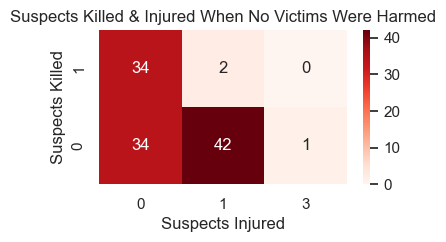

In [71]:
plt.figure(figsize=(4,2))
ax = sns.heatmap(sus_counts, 
                 annot=True, 
                 fmt="d", 
                 cmap="Reds")

ax.invert_yaxis()
ax.set_ylabel('Suspects Killed')
ax.set_xlabel('Suspects Injured')
plt.title('Suspects Killed & Injured When No Victims Were Harmed')
plt.show()

In [39]:
justice = no_vict[(no_vict.s_arrested > 1)]
justice

,date,dow,month,week,city,address,v_killed,v_injured,s_killed,s_injured,s_arrested,t_kill,t_inj,total,id
460,2024-10-19,Sat,Oct,42,Rockford,937 School St,0,0,0,1,4,0,1,1,3052644
542,2024-10-08,Tue,Oct,41,Rockford,Guilford Rd and N Mulford Rd,0,0,0,1,3,0,1,1,3043825
1873,2024-05-29,Wed,May,22,Chicago,6400 block of S Martin Luther King Dr,0,0,0,1,2,0,1,1,2926555
2200,2024-04-23,Tue,Apr,17,Chicago,8058 S Carpenter St,0,0,0,1,2,0,1,1,2888243
2887,2024-01-23,Tue,Jan,4,Argenta,E Duroc Rd and Cemetery Rd,0,0,0,0,2,0,0,0,2816991


In [46]:
no_harm_done = no_vict[(no_vict['s_killed'] == 0) & (no_vict['s_injured'] == 0) & (no_vict['s_arrested'] == 0)]
no_harm_done

,date,dow,month,week,city,address,v_killed,v_injured,s_killed,s_injured,s_arrested,t_kill,t_inj,total,id
235,2024-11-20,Wed,Nov,47,Chicago,110 E 61st St,0,0,0,0,0,0,0,0,3077163
527,2024-10-10,Thu,Oct,41,Chicago,4837 W Erie St,0,0,0,0,0,0,0,0,3044807
657,2024-09-28,Sat,Sep,39,Chicago,1210 W 78th Pl,0,0,0,0,0,0,0,0,3036340
807,2024-09-12,Thu,Sep,37,Lombard,1014 S Main St,0,0,0,0,0,0,0,0,3032624
857,2024-09-05,Thu,Sep,36,Kankakee,300 N Fifth Ave,0,0,0,0,0,0,0,0,3017187
936,2024-08-27,Tue,Aug,35,Chicago,NaN,0,0,0,0,0,0,0,0,3295941
1231,2024-07-27,Sat,Jul,30,Springfield,2171 S 9th St,0,0,0,0,0,0,0,0,2992407
1845,2024-06-01,Sat,Jun,22,Chicago,3700 block of N Spaulding Ave,0,0,0,0,0,0,0,0,2927617
2256,2024-04-15,Mon,Apr,16,Chicago,500 block of S Jefferson St,0,0,0,0,0,0,0,0,2880331
2381,2024-04-02,Tue,Apr,14,Chicago,1313 S Sacramento Dr,0,0,0,0,0,0,0,0,2872170


Of the 12 incidents that involved no one getting hurt or arrested: 
* 6 involved people reported or spotted **on or near school grounds with a gun**.
* 3 more involved an **attempted car-jacking, robbery or shooting** where the victim had a concealed carry license (CCL) and returned fire, but nobody was hit.
* 1 involved the **theft of 35 guns** from a storage unit.
* 1 was an event where people could **turn in their guns at a church**.
* 1 with **no information** about the incident.